In [1]:
import qecc as q
import itertools as itt
import random as ran
import matplotlib.pyplot as plt
import math
from scipy.special import binom

In [2]:
code = q.StabilizerCode.steane_code()
print(code)

7-qubit Steane code
S = <i^0 XXXXIII, i^0 XXIIXXI, i^0 XIXIXIX, i^0 ZZZZIII, i^0 ZZIIZZI, i^0 ZIZIZIZ>
Xbars = PauliList(i^0 XXXXXXX)
Zbars = PauliList(i^0 ZZZZZZZ)


In [3]:
enc = next(code.encoding_cliffords())
print(enc)

X[0] |->  +X[0] X[1] X[2] X[3] X[4] X[5] X[6]
X[1] |->  +Z[1] Z[2] Z[3] Z[4]
X[2] |->  +Z[0] Z[2]
X[3] |->  +Z[0] Z[1]
X[4] |->  +X[3] X[4] X[5] X[6]
X[5] |->  +X[0] X[1] X[2] X[3] X[4] X[6]
X[6] |->  +X[0] X[1] X[2] X[3] X[4] X[5]
Z[0] |->  +Z[0] Z[1] Z[2] Z[3] Z[4] Z[5] Z[6]
Z[1] |->  +X[0] X[1] X[2] X[3]
Z[2] |->  +X[0] X[1] X[4] X[5]
Z[3] |->  +X[0] X[2] X[4] X[6]
Z[4] |->  +Z[0] Z[1] Z[2] Z[3]
Z[5] |->  +Z[0] Z[1] Z[4] Z[5]
Z[6] |->  +Z[0] Z[2] Z[4] Z[6]


In [4]:
dec = enc.inv()
print(dec)

X[0] |->  +X[0] Z[2] Z[3] X[4] X[5] X[6]
X[1] |->  +X[0] Z[1] Z[3] X[4] X[5]
X[2] |->  +X[0] Z[1] Z[2] X[4] X[6]
X[3] |->  +X[0] Z[1] X[4]
X[4] |->  +X[0] Z[1] X[5] X[6]
X[5] |->  +X[0] X[5]
X[6] |->  +X[0] X[6]
Z[0] |->  +Z[0] X[1] X[2] X[3] Z[5] Z[6]
Z[1] |->  +Z[0] X[1] X[2] Z[5] Z[6]
Z[2] |->  +Z[0] X[1] X[3] Z[5] Z[6]
Z[3] |->  +Z[0] X[1] Z[4] Z[5] Z[6]
Z[4] |->  +Z[0] X[2] X[3] Z[4] Z[5] Z[6]
Z[5] |->  +Z[0] X[2] Z[4] Z[6]
Z[6] |->  +Z[0] X[3] Z[4] Z[5]


In [5]:
stab = q.StabilizerCode.unencoded_state(nq_logical=1, nq_ancilla=6)
print(enc(stab))

S = <i^0 XXXXIII, i^0 XXIIXXI, i^0 XIXIXIX, i^0 ZZZZIII, i^0 ZZIIZZI, i^0 ZIZIZIZ>
Xbars = PauliList(i^0 XXXXXXX)
Zbars = PauliList(i^0 ZZZZZZZ)


In [6]:
S = code.stabilizer_group()
for s in S:
    print(s)

i^0 I
i^0 XXXXIII
i^0 XXIIXXI
i^0 XIXIXIX
i^0 ZZZZIII
i^0 ZZIIZZI
i^0 ZIZIZIZ
i^0 IIXXXXI
i^0 IXIXXIX
i^0 YYYYIII
i^2 YYXXZZI
i^2 YXYXZIZ
i^0 IXXIIXX
i^2 YYZZXXI
i^0 YYIIYYI
i^2 YXZIYXZ
i^2 YZYZXIX
i^2 YZXIYZX
i^0 YIYIYIY
i^0 IIZZZZI
i^0 IZIZZIZ
i^0 IZZIIZZ
i^0 XIIXIXX
i^2 ZZYYXXI
i^2 ZZXXYYI
i^2 ZIYXYXZ
i^2 ZYZYXIX
i^2 ZYIXYZX
i^2 ZXZXYIY
i^2 XXYYZZI
i^2 XYXYZIZ
i^2 XYYXIZZ
i^2 ZYYZIXX
i^2 ZYXIZYX
i^2 ZXYIZXY
i^2 XXZZYYI
i^2 XYIZYXZ
i^2 XYZIXYZ
i^2 XIYZYZX
i^2 XZXZYIY
i^2 XZYIXZY
i^0 ZIIZIZZ
i^2 YZZYIXX
i^2 YZIXZYX
i^2 YIZXZXY
i^0 IIYYYYI
i^2 IZXYYXZ
i^2 IZYXXYZ
i^2 IXZYYZX
i^0 IYIYYIY
i^2 IYZXXZY
i^2 YXXYIZZ
i^2 IXYZZYX
i^2 IYXZZXY
i^0 IYYIIYY
i^2 YXIZXYZ
i^2 YIXZXZY
i^2 XIZYZYX
i^2 XZIYZXY
i^2 XZZXIYY
i^2 ZIXYXYZ
i^2 ZXIYXZY
i^2 ZXXZIYY
i^0 YIIYIYY


In [7]:
x1faults = set([''.join(i) for i in itt.permutations("XIIIIII")])
print(x1faults)
y1faults = set([''.join(i) for i in itt.permutations("YIIIIII")])
z1faults = set([''.join(i) for i in itt.permutations("ZIIIIII")])

{'IIIXIII', 'IIIIIXI', 'IXIIIII', 'IIIIXII', 'IIXIIII', 'IIIIIIX', 'XIIIIII'}


### Why does this work? What is effect.conjugate_pauli(meas).ph doing?

Per the docs, this conjugate_pauli(\rho) does 
$$
    C \rho C^\dagger
$$
and returns a Pauli operator. So why does this give a syndrome? We are getting the phase of the conjugated operator.

In [8]:
synd_meas = [q.elem_gen(7, idx, kind) for idx, kind in zip(list(range(1,7)), 'ZZZZZZ')]
print(synd_meas)

[i^0 IZIIIII, i^0 IIZIIII, i^0 IIIZIII, i^0 IIIIZII, i^0 IIIIIZI, i^0 IIIIIIZ]


In [9]:
# list syndromes
for xf in x1faults:
    print(xf, "-and-", q.Pauli(xf), "-and-", q.Pauli(xf).as_clifford(), '\n')
    effect = dec * q.Pauli(xf).as_clifford() * enc
    syn = [effect.conjugate_pauli(meas).ph / 2 for meas in synd_meas]
    synstr = ''.join([str(int(s)) for s in syn])
    print(effect, '\n', synstr, '\n\n')
for xf in z1faults:
    print(xf, "-and-", q.Pauli(xf), "-and-", q.Pauli(xf).as_clifford(), '\n')
    effect = dec * q.Pauli(xf).as_clifford() * enc
    syn = [effect.conjugate_pauli(meas).ph / 2 for meas in synd_meas]
    synstr = ''.join([str(int(s)) for s in syn])
    print(effect, '\n', synstr, '\n\n')
for xf in y1faults:
    print(xf, "-and-", q.Pauli(xf), "-and-", q.Pauli(xf).as_clifford(), '\n')
    effect = dec * q.Pauli(xf).as_clifford() * enc
    syn = [effect.conjugate_pauli(meas).ph / 2 for meas in synd_meas]
    synstr = ''.join([str(int(s)) for s in syn])
    print(effect, '\n', synstr, '\n\n')

IIIXIII -and- i^0 X[3] -and- Z[3] |->  -Z[3] 

X[1] |->  -X[1]
Z[0] |->  -Z[0]
Z[4] |->  -Z[4] 
 000100 


IIIIIXI -and- i^0 X[5] -and- Z[5] |->  -Z[5] 

Z[0] |->  -Z[0]
Z[5] |->  -Z[5] 
 000010 


IXIIIII -and- i^0 X[1] -and- Z[1] |->  -Z[1] 

X[1] |->  -X[1]
X[3] |->  -X[3]
Z[0] |->  -Z[0]
Z[4] |->  -Z[4]
Z[5] |->  -Z[5] 
 000110 


IIIIXII -and- i^0 X[4] -and- Z[4] |->  -Z[4] 

X[1] |->  -X[1]
Z[0] |->  -Z[0]
Z[5] |->  -Z[5]
Z[6] |->  -Z[6] 
 000011 


IIXIIII -and- i^0 X[2] -and- Z[2] |->  -Z[2] 

X[1] |->  -X[1]
X[2] |->  -X[2]
Z[0] |->  -Z[0]
Z[4] |->  -Z[4]
Z[6] |->  -Z[6] 
 000101 


IIIIIIX -and- i^0 X[6] -and- Z[6] |->  -Z[6] 

Z[0] |->  -Z[0]
Z[6] |->  -Z[6] 
 000001 


XIIIIII -and- i^0 X[0] -and- Z[0] |->  -Z[0] 

X[2] |->  -X[2]
X[3] |->  -X[3]
Z[0] |->  -Z[0]
Z[4] |->  -Z[4]
Z[5] |->  -Z[5]
Z[6] |->  -Z[6] 
 000111 


IZIIIII -and- i^0 Z[1] -and- X[1] |->  -X[1] 

X[0] |->  -X[0]
X[5] |->  -X[5]
X[6] |->  -X[6]
Z[1] |->  -Z[1]
Z[2] |->  -Z[2] 
 110000 


IIIZIII -and- i^

In [10]:
# make syndrome dictionary 

def syn2str(syn):
    return ''.join(str(int(s)) for s in syn)

def make_steane_dict():
    syndict = {'000000' : q.Pauli('IIIIIII')}
    synx = []
    synz = []
    for xf in x1faults:
    # singe x faults
        effect = dec * q.Pauli(xf).as_clifford() * enc
        syn = [effect.conjugate_pauli(meas).ph / 2 for meas in synd_meas]
        synx.append(syn)
        synstr = syn2str(syn)
        syndict[synstr] = q.Pauli(xf)
    
    for zf in z1faults:
        # single z faults
        effect = dec * q.Pauli(zf).as_clifford() * enc
        syn = [effect.conjugate_pauli(meas).ph / 2 for meas in synd_meas]
        synz.append(syn)
        synstr = syn2str(syn)
        syndict[synstr] = q.Pauli(zf)
    
    for sx in synx:
        for sz in synz:
            synstr = syn2str(sz[0:3]+sx[3:6])
            sxstr = syn2str(sx)
            szstr = syn2str(sz)
            syndict[synstr] = syndict[sxstr]*syndict[szstr]
    return syndict

In [11]:
syndict = make_steane_dict()
print(len(syndict), '=', 2**6)
print(syndict)

64 = 64
{'000000': i^0 IIIIIII, '000100': i^0 IIIXIII, '000010': i^0 IIIIIXI, '000110': i^0 IXIIIII, '000011': i^0 IIIIXII, '000101': i^0 IIXIIII, '000001': i^0 IIIIIIX, '000111': i^0 XIIIIII, '110000': i^0 IZIIIII, '100000': i^0 IIIZIII, '001000': i^0 IIIIIIZ, '011000': i^0 IIIIZII, '101000': i^0 IIZIIII, '010000': i^0 IIIIIZI, '111000': i^0 ZIIIIII, '110100': i^0 IZIXIII, '100100': i^3 IIIYIII, '001100': i^0 IIIXIIZ, '011100': i^0 IIIXZII, '101100': i^0 IIZXIII, '010100': i^0 IIIXIZI, '111100': i^0 ZIIXIII, '110010': i^0 IZIIIXI, '100010': i^0 IIIZIXI, '001010': i^0 IIIIIXZ, '011010': i^0 IIIIZXI, '101010': i^0 IIZIIXI, '010010': i^3 IIIIIYI, '111010': i^0 ZIIIIXI, '110110': i^3 IYIIIII, '100110': i^0 IXIZIII, '001110': i^0 IXIIIIZ, '011110': i^0 IXIIZII, '101110': i^0 IXZIIII, '010110': i^0 IXIIIZI, '111110': i^0 ZXIIIII, '110011': i^0 IZIIXII, '100011': i^0 IIIZXII, '001011': i^0 IIIIXIZ, '011011': i^3 IIIIYII, '101011': i^0 IIZIXII, '010011': i^0 IIIIXZI, '111011': i^0 ZIIIXII, '1

In [12]:
print(code.stabilizer_subspace())

[[ 3.53553391e-01+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  7.84653607e-49-6.15617160e-65j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  1.05094714e-48-8.24543582e-65j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   3.53553

In [13]:
def simple_simulation(N):
    """
    simple simulation of 1-qubit errors
    for each n in range(N):
        pick 1-qubit Pauli error uniformly at random
        apply error, find correction operator, and decode
    """
    xset = set([''.join(p) for p in itt.permutations('XIIIIII')])
    yset = set([''.join(p) for p in itt.permutations('YIIIIII')])
    zset = set([''.join(p) for p in itt.permutations('ZIIIIII')])
    xzset = set([''.join(p) for p in itt.permutations('ZXIIIII')])
    eset = xset|yset|zset|xzset
    synd_meas = [q.elem_gen(7, idx, kind) for idx, kind in zip(list(range(1,7)), 'ZZZZZZ')]
    for n in range(N):
        e = ran.sample(eset, k=1)[0]
        print("Error ", e)
        effect = dec * q.Pauli(e).as_clifford() * enc
        print("\nHas effect:\n", effect)
        syn = [effect.conjugate_pauli(meas).ph / 2 for meas in synd_meas]
        synstr = ''.join([str(int(s)) for s in syn])
        print("\nWith Syndrome:", synstr)
        rec = syndict[synstr]
        print("\nand recovery operator", rec)
        correction = dec * rec.as_clifford() * q.Pauli(e).as_clifford() *  enc
        print("\nand new effect", correction)
        syn = [correction.conjugate_pauli(meas).ph / 2 for meas in synd_meas]
        print("\nand new syndrome:", syn)  
        print("=========================================\n\n")

In [14]:
simple_simulation(10)

Error  IYIIIII

Has effect:
 X[0] |->  -X[0]
X[1] |->  -X[1]
X[3] |->  -X[3]
X[5] |->  -X[5]
X[6] |->  -X[6]
Z[0] |->  -Z[0]
Z[1] |->  -Z[1]
Z[2] |->  -Z[2]
Z[4] |->  -Z[4]
Z[5] |->  -Z[5]

With Syndrome: 110110

and recovery operator i^3 Y[1]

and new effect eye_p(7)

and new syndrome: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


Error  IIYIIII

Has effect:
 X[0] |->  -X[0]
X[1] |->  -X[1]
X[2] |->  -X[2]
X[5] |->  -X[5]
X[6] |->  -X[6]
Z[0] |->  -Z[0]
Z[1] |->  -Z[1]
Z[3] |->  -Z[3]
Z[4] |->  -Z[4]
Z[6] |->  -Z[6]

With Syndrome: 101101

and recovery operator i^3 Y[2]

and new effect eye_p(7)

and new syndrome: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


Error  IIXIIZI

Has effect:
 X[0] |->  -X[0]
X[1] |->  -X[1]
X[2] |->  -X[2]
X[4] |->  -X[4]
X[6] |->  -X[6]
Z[0] |->  -Z[0]
Z[2] |->  -Z[2]
Z[4] |->  -Z[4]
Z[6] |->  -Z[6]

With Syndrome: 010101

and recovery operator i^0 X[2] Z[5]

and new effect eye_p(7)

and new syndrome: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


Error  XZIIIII

Has effect:
 X[0] |->  -X[0]
X[2

In [15]:
def logical_error_count_local(N, code, synd_meas, synd_dict, p_depol):
    """
    estimate logical error rate of the code under the depolarizing model, 
    assuming a local form to the depolarizing noise
    """
    enc = next(code.encoding_cliffords())
    dec = enc.inv()
    nq = code.nq
    r = nq - code.nq_logical
    idstr = ''.join('I' for _ in range(nq))
    faults = 0
    for n in range(N): # for each sample
        error = q.Pauli(idstr)
        elist = ['I' for _ in range(nq)]
        for b in range(nq): # for each qubit
            u = ran.uniform(0, 1)
            if u < p_depol:
                p = ran.sample({'X', 'Y', 'Z'}, 1)[0]
                elist[b] = p
            estr = ''.join(c for c in elist)
            error = error*q.Pauli(estr)
        effect = dec * error.as_clifford() * enc
        syn = [effect.conjugate_pauli(meas).ph / 2 for meas in synd_meas]
        synstr = syn2str(syn)
        correction = synd_dict[synstr]
        prod = correction*error
        prod.set_phase(0)
        if prod != q.Pauli(idstr):
            faults = faults + 1
    return faults



def logical_error_count_global(N, code, synd_meas, synd_dict, p_depol):
    """
    estimate logical error rate of the code under the depolarizing model, 
    assuming a global form to the depolarizing noise
    """
    enc = next(code.encoding_cliffords())
    dec = enc.inv()
    nq = code.nq
    r = nq - code.nq_logical
    idstr = 'I'*nq
    pset = [''.join(p) for p in itt.product('IXYZ', repeat=nq)]
    pset.remove(idstr)
    faults = 0
    for n in range(N): # for each sample
        error = q.Pauli(idstr)
        elist = ['I' for _ in range(nq)]
        u = ran.uniform(0, 1)
        if u < p_depol:
            estr = ran.sample(pset, k=1)[0]
        else:
            estr = idstr
        error = q.Pauli(estr)
        effect = dec * error.as_clifford() * enc
        syn = [effect.conjugate_pauli(meas).ph / 2 for meas in synd_meas]
        synstr = syn2str(syn)
        correction = synd_dict[synstr]
        prod = correction*error
        prod.set_phase(0)
        if prod != q.Pauli(idstr):
            faults = faults + 1
    return faults

In [16]:
code = q.StabilizerCode.steane_code()
synd_meas = [q.elem_gen(7, idx, kind) for idx, kind in zip(list(range(1,7)), 'ZZZZZZ')]
synd_dict = make_steane_dict()
n_local = logical_error_count_local(100, code, synd_meas, synd_dict, 0.1)
n_global = logical_error_count_global(100, code, synd_meas, synd_dict, 0.1)
print(n_local, n_global)

3 10


Probablity of a logical error  is 
$$
    P(\text{logical error}) = 1 - P(\{\text{no errors}\} \cup \{\text{only 1-qubit errors}\} \cup \{\text{disjoint 2-qubit errors}\} )
$$
under local model
$$
    P(\{\text{only 1-qubit errors}\} = n (1-p)^n p
$$$$
    P(\{\text{disjoint 2-qubit errors}\} = P(\{\text{2 xz errors that do not overlap}\})
$$$$
= \frac{2}{9}  { n \choose 2} (1-p)^{n-2} p^2
$$
hence
$$
    P(\text{logical error}) = 1 - (1-p)^n - n(1-p)^{n-1} p -  \bigg( \frac{2}{3} \bigg)^2 { n \choose 2} (1-p)^{n-2} p^2
$$
i.e., probablity that we dont get more than one error on each qubit 

Under global model
$$
    P(\{\text{only 1-qubit errors}\} = P(\{\text{error} \} \cap \{ \text{1-qubit type}\}  = p \times \frac{n}{4^n-1}
$$
$$
    P(\{\text{disjoint 2-qubit errors}\} = \frac{(2/3)^2 {n \choose 2} }{4^n-1}
$$
hence
$$
    P(\text{logical error}) = 1 - \frac{n + (2/9) {n \choose 2}}{4^n-1}
$$

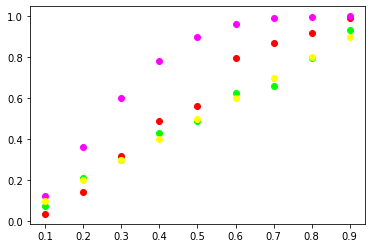

In [19]:
# make logical error plots
cnt = 200
depolset = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
nq = code.nq
for p_depol in depolset:
    n_local = logical_error_count_local(cnt, code, synd_meas, synd_dict, p_depol)
    n_global = logical_error_count_global(cnt, code, synd_meas, synd_dict, p_depol)
    ploc = n_local/cnt
    pglob = n_global/cnt
    ploc_t = 1 - (1-p_depol)**nq - nq*p_depol*(1-p_depol)**(nq-1)  - (2/9)*binom(nq, 2)*((1-p_depol)**(nq-2))*p_depol**2
    pglob_t = p_depol*(1 - (nq + (2/9)*binom(nq, 2))/(4**nq - 1))
    plt.scatter(p_depol, ploc, color=[1.0, 0.0, 0.0])
    plt.scatter(p_depol, ploc_t, color=[1.0, 0.0, 1.0])
    plt.scatter(p_depol, pglob, color=[0.0, 1.0, 0.0])
    plt.scatter(p_depol, pglob_t, color=[1.0, 1.0, 0.0])

In [45]:
containing_folder = '/home/jpmarceaux/'
import sys
sys.path.insert(0, containing_folder)
from jpq import *
import numpy as np

In [46]:
from qiskit import Aer, IBMQ, execute
from qiskit.providers.aer import noise as ns
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.tools.visualization import plot_histogram
from qiskit.tools.monitor import job_monitor
from qiskit.providers.aer.noise import NoiseModel
from qiskit.providers.aer.noise.errors import pauli_error, depolarizing_error
provider = IBMQ.load_account()
provider.backends()

/usr/lib/python3.8/site-packages/qiskit/providers/ibmq/ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_athens') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [122]:
def quasm2assm(text):
    lset = text.split('\n')
    opout = []
    for line in lset:
        tup = line.split(' ')
        while('' in tup):
            tup.remove('')
        if tup[0] == 'H':
            opout.append([('h', int(tup[1]))])
        elif tup[0] == 'X':
            opout.append([('x', int(tup[1]))])
        elif tup[0] == 'Y':
            opout.append([('y', int(tup[1]))])
        elif tup[0] == 'Z':
            opout.append([('z', int(tup[1]))])
        elif tup[0] == 'X':
            opout.append([('x', int(tup[1]))])
        elif tup[0] == 'R_pi4':
            opout.append([('s', int(tup[1]))])
        elif tup[0] == 'CNOT':
            opout.append([('cx', int(tup[1]), int(tup[2]))])
        elif tup[0] == 'CZ':
            opout.append([('cx', int(tup[1]), int(tup[2]))])
        elif tup[0] == 'I':
            /
        else:
            raise RuntimeError(f'in quasm2assm {tup[0]} not in idex set')
    return opout